In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoTokenizer
from datasets import load_dataset, concatenate_datasets

In [6]:
# location of the preprocessed dataset
DATA_LOCATION = "../data/"
# HF tokenizer which is used to count tokens
TOKENIZER_ID = "google/flan-t5-base"


In [13]:
# load data
data = load_dataset('json', data_files={'train': [f'{DATA_LOCATION}train.json'],
                                           'val': [f'{DATA_LOCATION}val.json'],
                                         'test': [f'{DATA_LOCATION}test.json']})

In [16]:
# concatenate train + val data, so we can explore both together
data = concatenate_datasets([data['train'], data['val']]).to_pandas()

In [18]:
def plot_column_counts(df: pd.DataFrame, column: str):
    column_counts = df[column].value_counts()
    column_percentage = column_counts / len(df)

    print(column_counts)
    print(column_percentage)
    
    ax = column_counts.plot(kind='bar', color=['skyblue', 'green', 'orange', "red"])

    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of column: {column}')

    plt.show()

label
Contradiction    950
Entailment       950
Name: count, dtype: int64
label
Contradiction    0.5
Entailment       0.5
Name: count, dtype: float64


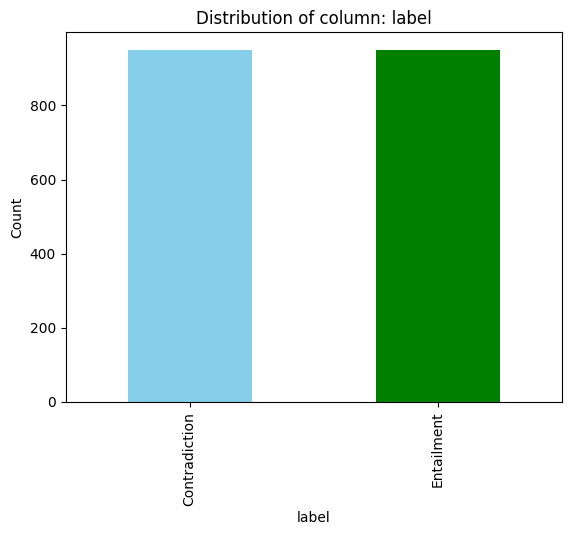

type
Single        1175
Comparison     725
Name: count, dtype: int64
type
Single        0.618421
Comparison    0.381579
Name: count, dtype: float64


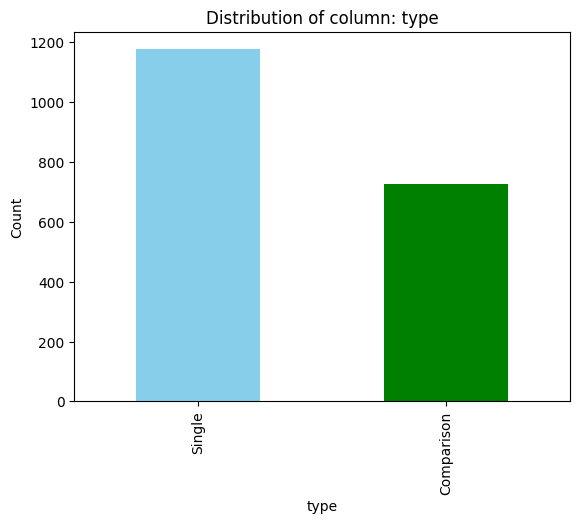

section_id
Adverse Events    548
Eligibility       542
Intervention      432
Results           378
Name: count, dtype: int64
section_id
Adverse Events    0.288421
Eligibility       0.285263
Intervention      0.227368
Results           0.198947
Name: count, dtype: float64


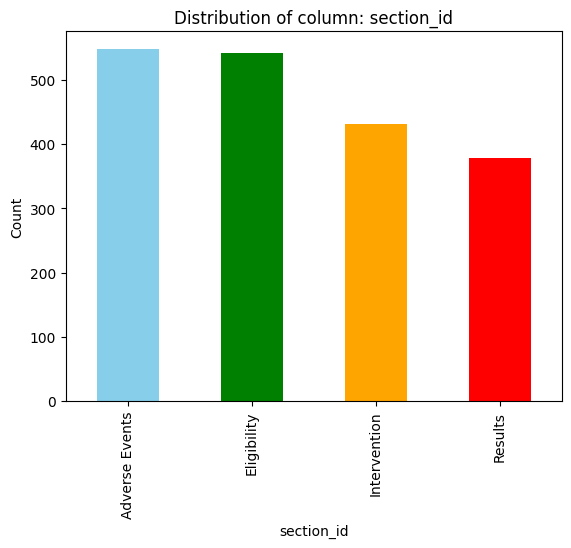

In [20]:
# plot columns 
plot_column_counts(data,'label')
plot_column_counts(data,'type')
plot_column_counts(data,'section_id')

In [ ]:
# define tokenizer on which the token count is based
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_ID)

def count_total_tokens_in_row(row):
    return len(tokenizer.tokenize(row['text']))

# add a column which counts tokens of the input sequence for each row
data['num_tokens'] = data.apply(count_total_tokens_in_row,axis=1)

In [ ]:
# get min value of num_tokens
print(data['num_tokens'].min())
# get max value of num_tokens
print(data['num_tokens'].max())
# get mean value of num_tokens
print(data['num_tokens'].mean())
# get median value of num_tokens
print(data['num_tokens'].median())

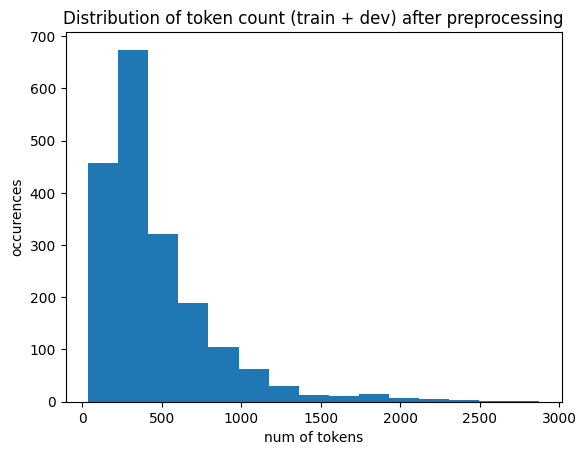

In [24]:
# plot token count distribution of the input sequence
plt.hist(data['num_tokens'], bins= 15)
plt.xlabel("num of tokens")
plt.ylabel("occurences")
plt.title("Distribution of token count (train + dev) after preprocessing")
plt.show()